# The Cumulative Distribution Function - Lab

## Introduction

In the previous lesson, you learned how you can create a cumulative distribution function for discrete and continuous random variables. In this lab, you'll try to calculate a CDF for a dice roll yourself, and visualize it.

## Objectives
You will be able to:

* Calculate CDF in Python for a given discrete variable with a limited set of possible values
* Visualize and inspect a CDF in order to make assumptions about the underlying data

## Calculating CDF in Python 

Recall the formula to calculate the cumulative probability from the previous lesson:

$$\Large F(x)= P(X \leq x)$$

So given a list of all possible values of x, We can easily calculate the CDF for a given possible value $X$ by performing the following steps:

* Build a function `calculate_cdf(lst,X)`, where `lst` is a list of all possible values in a discrete variable $x$ (6 values for a dice roll), and $X$ is the value for which we want to calculate the cumulative distribution function 
* Initialize a variable called `count`
* For all values in `lst`, if a value is less than or equal to $X$, add one to `count` - do nothing otherwise. (this will tell us the total number of values less than $X$) 
* Calculate the cumulative probability of $X$ dividing `count` by the total number of possible values
* Round by 3 decimals and return the cumulative probability of $X$


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [1]:
def calculate_cdf(lst, X):
    count = 0
    for val in lst:
        if val <= X:
            count += 1
        else:
            continue
    cum_prob = round(count / len(lst), 3)
    
    return cum_prob

# test data
test_lst = [1,2,3]
test_X = 2

calculate_cdf(test_lst, test_X)

# 0.667

0.667

Now, use this function to calculate a CDF for each value in a dice roll so you can plot it later on.

Perform the following steps in the cell below:
* Create a list `dice_lst` with all possible values of a fair dice
* Initialize an empty list `dice_cum` for storing cumulative probabilities for these values.
* For each value in the `dice_lst` calculate its cumulative probability using the function above and store in `dice_cum` list. 

In [2]:
dice_lst = [1,2,3,4,5,6]
dice_cum = [calculate_cdf(dice_lst, val) for val in dice_lst]


dice_cum

# [0.167, 0.333, 0.5, 0.667, 0.833, 1.0]

[0.167, 0.333, 0.5, 0.667, 0.833, 1.0]

> CDFs are implemented with two sorted lists: one list which contains the potential outcome values of your discrete distribution, and another list which contains cumulative probabilities.

Following this, we now have a list of possible values and a second list containing cumulative probabilities for each value. Let's go ahead and plot these values in matplotlib using a bar plot. 
* Use `dice_lst` for x-axis and `dice_cum` for y-axis

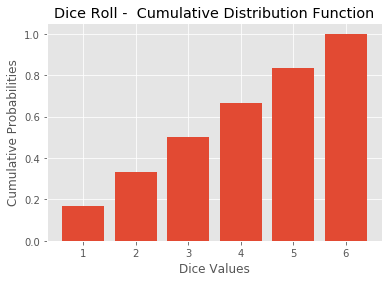

In [10]:
## using matplotlib
plt.bar(dice_lst, dice_cum);
plt.title ("Dice Roll -  Cumulative Distribution Function");
plt.xlabel('Dice Values')
plt.ylabel('Cumulative Probabilities');

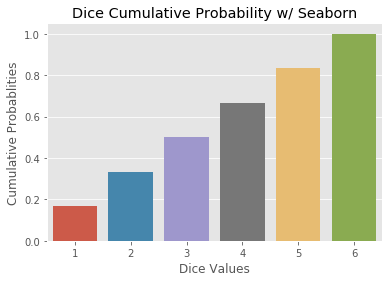

In [8]:
# Using Seaborn
ax = sns.barplot(x=dice_lst, y=dice_cum)
plt.title('Dice Cumulative Probability w/ Seaborn')
ax.set(xlabel='Dice Values', ylabel='Cumulative Probablities')
plt.show()

## Level Up (optional)

CDFs (and PMFs) can be calculated using built-in NumPy and matplotlib methods. So we don't have create custom functions to calculate these. We can draw a histogram styled CDF as shown below using the following steps

You would need to perform these steps
* Use `np.histogram()` to automatically calculate the histogram with probabilities. [Here is numpy histogram documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html) to help you dig deeper.

* Use [`plt.scatter()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) method with [`np.cumsum()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cumsum.html) to calculate and plot cumulative probabilities (just like we did above). 


/Users/scojopro/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  This is separate from the ipykernel package so we can avoid doing imports until


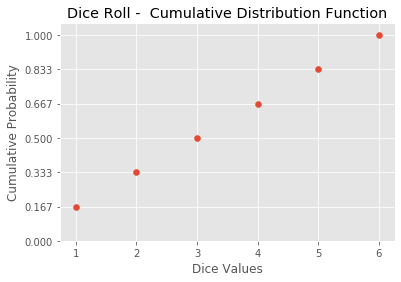

In [11]:
import numpy as np
sample = [1,2,3,4,5,6]
hist = np.histogram(sample, bins=6, range=(1,7), normed=True)
plt.scatter(hist[1][:-1], np.cumsum(hist[0]))
plt.title ("Dice Roll -  Cumulative Distribution Function");
plt.xlabel("Dice Values")
plt.ylabel("Cumulative Probability")
plt.yticks(np.linspace(0,1,num=7))
plt.show()

## Summary 

In this lesson, we looked at developing a CDF - a percentile function of a discrete random variable. We looked at how to calculate and visualize a CDF. This technique can also be applied to continuous random variables which we shall see later in this section. 